# **Materi 16 - Statistical Test I**

Introduction to Probability Course - Sekolah Data - Pacmann Academy

# Outline
---

1. Review Materi Statistical Test II
2. Case 1 - Apakah lebih dari 70% penduduk kota A bahagia?
3. Case 2 - Perencanaan Gedung Serba Guna (GSG)
4. Case 3 - Resep baru di restoran A
5. Case 4 - Perusahaan Tuna

- Kita perlu memanggil library dan fungsi yang diperlukan untuk menjalankan code dalam notebook ini.

In [1]:
# Process data
import pandas as pd
import numpy as np

# Visualize data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Review materi
---

Dari materi yang sudah dipelajari di video:

## Hypothesis testing for Proportion
---

- **Proporsi** adalah perbandingan antara terjadinya suatu kejadian dengan semua kemungkinan kejadian yang bisa terjadi.
- Langkah-langkah uji hipotesis sama seperti materi 15.
- Uji proporsi dapat menggunakan t-test atau z-test.

## Hypothesis testing for Variance
---

- Kita dapat uji varians dari populasi/sample.
- Uji varians menggunakan *chi-square test*

# Case Study 1 - Proporsi Bahagia!
---

- Seorang walikota di suatu kota ingin mengetahui apakah lebih dari 70% warganya sudah bahagia atau tidak.

- Dia meminta seorang konsultan dengan menggunakan biaya yang terbatas dan waktu yang singkat.

- Dari 100.000 sampel penduduk diperoleh bahwa 70.1% sampel tersebut bahagia.

- Apakah 70.1% telah menjadi bukti bahwa lebih dari 70% penduduk di kota tersebut itu sudah bahagia? Gunakan taraf signifikansi 5%

## Hipotesis
---

Dari latar belakang itu, kita dapat membangun hipotesis sebagai berikut:
- $H_{0}$: $\bar{p} = p_{0}$
- $H_{1}$: $\bar{p} > p_{0}$

## Uji statistik
---

- Apa yang kita bandingkan? **Proporsi**, bisa gunakan z-test

Permasalahan tersebut dapat diselesaikan dengan menggunakan uji hipotesis proporsi satu populasi. Kita dapat menggunakan distribusi z untuk menyelesaikan permasalahan tersebut :
$$
z = \frac{\bar{p}-{p}_{0}}{\sqrt{\frac{p_{0}(1-p_{0})}{n}}}
$$

dengan,
$$
\bar{p} = \frac{x}{n}
$$

In [2]:
# Buat variable
p_bar = 0.71
p_0 = 0.7
n = 100_000

print(f'Proporsi sample   : {p_bar:.2f}')
print(f'Proporsi populasi : {p_0:.2f}')
print(f'Jumlah sample     : {n} penduduk')

Proporsi sample   : 0.71
Proporsi populasi : 0.70
Jumlah sample     : 100000 penduduk


Hitung z score

In [3]:
z_score = (p_bar-p_0) / np.sqrt(p_0 * (1-p_0) / n)
print(f'Z score : {z_score:.4f}')

Z score : 6.9007


- Nilai positif karena $\bar{p}$ lebih besar dibanding $p_{0}$
- Dalam visualisasi

In [4]:
from scipy.stats import norm

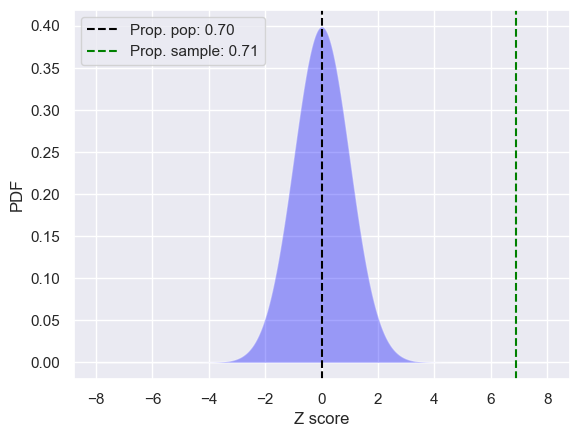

In [5]:
# Visualisasi distribusi t-score
p_ = np.arange(-8, 8, 0.01)
pdf_ = norm.pdf(p_)

plt.fill_between(p_, pdf_, facecolor='blue', alpha=0.35)

plt.axvline(0.0, linestyle='--', color='black', label=f'Prop. pop: {p_0:.2f}')
plt.axvline(z_score, linestyle='--', color='green', label=f'Prop. sample: {p_bar:.2f}')

plt.xlabel('Z score')
plt.ylabel('PDF')
plt.legend()
plt.show()

## Membuat keputusan
---

- Definisikan significance level, misal $\alpha = 0.05$ atau confidence level 95%

In [6]:
alpha = 0.05

#### Cara 1: Gunakan `z_critical`
---

- Informasi $\alpha$ harus dikonversi dalam sudut pandang Z-score agar bisa menjadi threshold penentu signifikansi uji.
- **Ingat**, $\alpha$ serupa dengan confidence level (CDF) dari distribusi Z-score.
- Maka, $\alpha = 0.05$ atau confidence level 95% adalah `z_score` yang menyebabkan CDF = 0.95.

In [7]:
# Hitung ppf
# ppf dihitung 1-alpha karena H1 mengandung operator ">"
z_critical = norm.ppf(1.-alpha)

print(f'Saat alpha={alpha}, z_critical={z_critical:.4f}')

Saat alpha=0.05, z_critical=1.6449


- `z_critical` positif karena $\bar{p} > p_{0}$
- Coba visualkan $\alpha$ atau `z_critical`

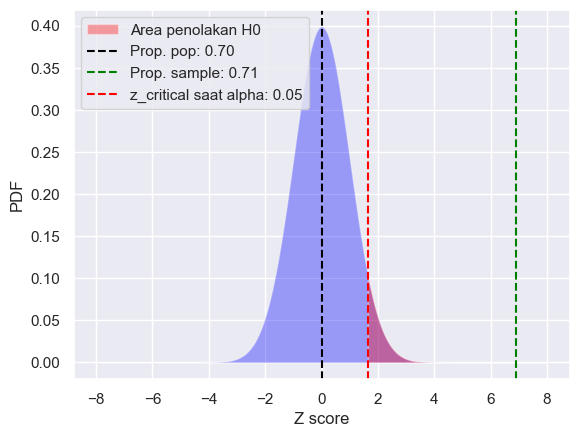

In [8]:
plt.fill_between(p_, pdf_, facecolor='blue', alpha=0.35)

plt.fill_between(np.arange(z_critical, 8.0, 0.01),
                 norm.pdf(np.arange(z_critical, 8.0, 0.01)),
                 facecolor='red',
                 alpha=0.35,
                 label='Area penolakan H0')

plt.axvline(0.0, linestyle='--', color='black', label=f'Prop. pop: {p_0:.2f}')
plt.axvline(z_score, linestyle='--', color='green', label=f'Prop. sample: {p_bar:.2f}')
plt.axvline(z_critical, linestyle='--', color='red', label=f'z_critical saat alpha: {alpha}')

plt.xlabel('Z score')
plt.ylabel('PDF')
plt.legend()
plt.show()

- Sekarang kita bisa buat keputusan.

$$
\text{decision} =
\begin{cases}
 & \text{H0 ditolak,} \text{ jika } z_{\text{test}} > z_{\text{crit}} \\
 & \text{H0 gagal ditolak,} \text{ jika } z_{\text{test}} \leq z_{\text{crit}}
\end{cases}
$$

In [9]:
print('Pengambilan Keputusan:')
if z_score > z_critical:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


#### Cara 2: Gunakan $\alpha$
---

- $\alpha$ analog dengan CDF dari distribusi z.
- Maka kita bisa konversi `Z_score` ke dalam CDF
- Ini bisa didapat menggunakan fungsi `z.cdf()`
- Hasil konversi ini disebut dengan **p_value**

In [10]:
# Hitung p_value dari z_score
# 1 - cdf karena right-sided
p_value = 1-norm.cdf(z_score)
print(f'p_value : {p_value:.4e}')

p_value : 2.5882e-12


- Sekarang kita bisa buat keputusan.

$$
\text{decision} =
\begin{cases}
 & \text{H0 ditolak,} \text{ jika } \text{p_value} < \alpha \\
 & \text{H0 gagal ditolak,} \text{ jika } \text{p_value} \geq \alpha
\end{cases}
$$

In [11]:
print('Pengambilan Keputusan:')
if p_value < alpha:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


## Gunakan Library untuk uji hipotesis
---

- Kita gunakan library `statsmodels.stats.proportion.proportions_ztest`

In [13]:
# Import library
from statsmodels.stats.proportion import proportions_ztest

In [14]:
z_score, p_value = proportions_ztest(
    count = int(p_bar*n),
    nobs = n,
    value = p_0,
    alternative = 'larger'
)

print(f'Z score : {z_score:.4f}')
print(f'P value : {p_value:.4f}')

Z score : 6.9690
P value : 0.0000


Pengambilan keputusan

In [15]:
print('Pengambilan Keputusan:')
if z_score > z_critical:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


In [16]:
print('Pengambilan Keputusan:')
if p_value < alpha:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


# Case Study 2 - Gedung Serba Guna (GSG)
---

- Walikota berencana mendirikan sebuah gedung pertemuan serba guna.
- Lokasi gedung yang akan dibangun itu berada di dalam kota.
- Dilakukan pemungutan suara pada penduduk kota dan penduduk sekitar kota.
- Para penduduk yang tinggal di sekitar kota itu merasa bahwa rencana itu akan lolos karena besarnya proporsi penduduk kota yang menyetujuinya.
- Konsultan tersebut diminta kembali oleh walikota untuk membuktikan bahwa proporsi penduduk kota yang menyetujui rencana tersebut lebih tinggi daripada proporsi penduduk di sekitar kota yang menyetujui rencana tersebut.
- Untuk mengetahui apakah ada selisih yang nyata antara proporsi penduduk kota dan penduduk di sekitar kota itu yang menyetujui rencana tersebut, diambil suatu sampel acak.
- Didapat yang menyetujui rencana tersebut adalah
  - 120 di antara 200 penduduk kota dan
  - 240 di antara 500 penduduk di sekitar kota





## Hipotesis
---

Dari latar belakang itu, kita dapat membangun hipotesis sebagai berikut:
- $H_{0}$: $p_{1} = p_{2}$
- $H_{1}$: $p_{1} \neq p_{2}$

Dengan
- $1$: dalam kota
- $2$: sekitar kota

## Uji statistik
---

- Apa yang kita bandingkan? **Proporsi**, bisa gunakan z-test
- Apa populasi sama? **Tidak**, dari dalam kota dan sekitar kota

- Permasalahan tersebut dapat diselesaikan dengan menggunakan uji hipotesis proporsi dua populasi. Kita dapat menggunakan distribusi z untuk menyelesaikan permasalahan tersebut :
$$
z = \frac
{\bar{p}_{1}-\bar{p}_{2}}
{\sqrt{\bar{p}(1-\bar{p})(\frac{1}{n_{1}}+\frac{1}{n_{2}})}} $$

- dengan,
$$
\bar{p} = \frac{x_{1} + x_{2}}{n_{1} + n_{2}}
$$


- Mari lakukan pengujian

In [17]:
# Hitung semua variabel yang dibutuhkan
# Ingat
# 1: Dalam kota, 2: Sekitar kota
n_1 = 200
n_2 = 500
x_1 = 120
x_2 = 240

p1_bar = x_1/n_1
p2_bar = x_2/n_2

print('Dalam kota:')
print(f'  - Setuju (x)   : {x_1}')
print(f'  - Total  (n)   : {n_1}')
print(f'  - Proporsi (p) : {p1_bar}')
print('Sekitar kota:')
print(f'  - Setuju (x)   : {x_2}')
print(f'  - Total  (n)   : {n_2}')
print(f'  - Proporsi (p) : {p2_bar}')

Dalam kota:
  - Setuju (x)   : 120
  - Total  (n)   : 200
  - Proporsi (p) : 0.6
Sekitar kota:
  - Setuju (x)   : 240
  - Total  (n)   : 500
  - Proporsi (p) : 0.48


In [18]:
# Hitung z-score
p_bar = (x_1+x_2) / (n_1+n_2)
z_score = (p1_bar-p2_bar) / np.sqrt(p_bar * (1.-p_bar) * ((1./n_1) + (1./n_2)))

print(f'Z score : {z_score:.4f}')

Z score : 2.8697


- Nilai positif karena $p_{1}$ lebih besar dibanding $p_{2}$
- Dalam visualisasi

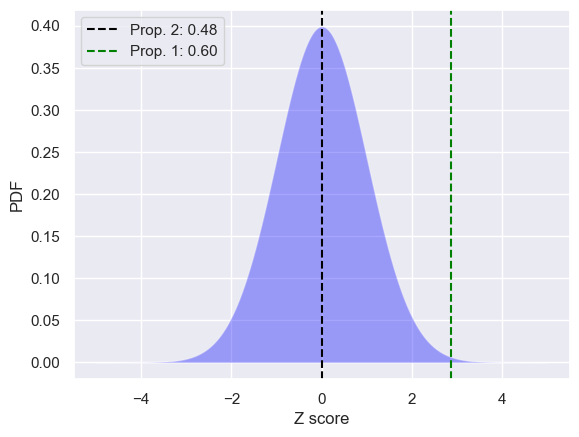

In [19]:
# Visualisasi distribusi t-score
z_ = np.arange(-5, 5, 0.01)
pdf_ = norm.pdf(z_)

plt.fill_between(z_, pdf_, facecolor='blue', alpha=0.35)

plt.axvline(0.0, linestyle='--', color='black', label=f'Prop. 2: {p2_bar:.2f}')
plt.axvline(z_score, linestyle='--', color='green', label=f'Prop. 1: {p1_bar:.2f}')

plt.xlabel('Z score')
plt.ylabel('PDF')
plt.legend()
plt.show()

### Membuat keputusan
---

- Definisikan significance level, misal $\alpha = 0.05$ atau confidence level 95%

In [20]:
alpha = 0.05

#### Cara 1: Gunakan `z_critical`
---

- Informasi $\alpha$ harus dikonversi dalam sudut pandang Z-score agar bisa menjadi threshold penentu signifikansi uji.
- **Ingat**, $\alpha$ serupa dengan confidence level (CDF) dari distribusi Z-score.
- Maka, $\alpha = 0.05$ atau confidence level 95% adalah `Z_score` yang menyebabkan CDF = 0.95.

In [21]:
# Hitung ppf
# Karena ini two-sided, nilai alpha dibagi 2
# sehingga ada 2 nilai kritikal
z_crit_lower = norm.ppf(alpha/2.)
z_crit_upper = norm.ppf(1 - (alpha/2.))

print(f'Saat alpha={alpha}, z_crit_lower={z_crit_lower:.4f}')
print(f'Saat alpha={alpha}, z_crit_upper={z_crit_upper:.4f}')

Saat alpha=0.05, z_crit_lower=-1.9600
Saat alpha=0.05, z_crit_upper=1.9600


- Coba visualkan $\alpha$ atau `z_critical`

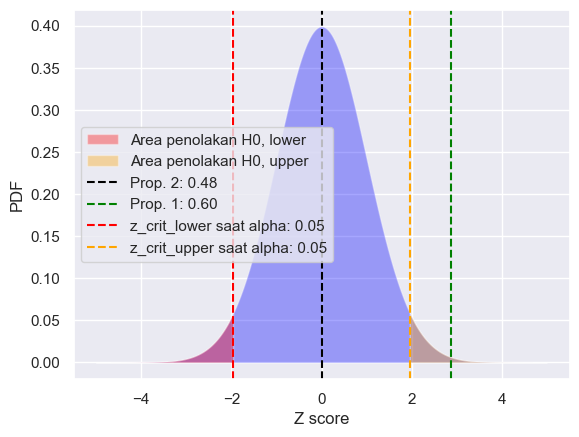

In [22]:
plt.fill_between(z_, pdf_, facecolor='blue', alpha=0.35)
plt.fill_between(np.arange(-5.0, z_crit_lower, 0.01),
                 norm.pdf(np.arange(-5.0, z_crit_lower, 0.01)),
                 facecolor='red',
                 alpha=0.35,
                 label='Area penolakan H0, lower')
plt.fill_between(np.arange(z_crit_upper, 5.0, 0.01),
                 norm.pdf(np.arange(z_crit_upper, 5.0, 0.01)),
                 facecolor='orange',
                 alpha=0.35,
                 label='Area penolakan H0, upper')

plt.axvline(0.0, linestyle='--', color='black', label=f'Prop. 2: {p2_bar:.2f}')
plt.axvline(z_score, linestyle='--', color='green', label=f'Prop. 1: {p1_bar:.2f}')
plt.axvline(z_crit_lower, linestyle='--', color='red', label=f'z_crit_lower saat alpha: {alpha}')
plt.axvline(z_crit_upper, linestyle='--', color='orange', label=f'z_crit_upper saat alpha: {alpha}')

plt.xlabel('Z score')
plt.ylabel('PDF')
plt.legend()
plt.show()

- Sekarang kita bisa buat keputusan.

$$
\text{decision} =
\begin{cases}
 & \text{H0 ditolak,} \text{ jika } z_{\text{test}} < z_{\text{crit lower}} \\
  & \text{H0 ditolak,} \text{ jika } z_{\text{test}} > z_{\text{crit upper}} \\
 & \text{H0 gagal ditolak,} \text{ jika } z_{\text{crit lower}} \leq z_{\text{test}} \leq z_{\text{crit upper}}
\end{cases}
$$

In [23]:
print('Pengambilan Keputusan:')
if z_score < z_crit_lower:
    print('Tolak H0')
elif z_score > z_crit_upper:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


#### Cara 2: Gunakan $\alpha$
---

- $\alpha$ analog dengan CDF dari distribusi z.
- Maka kita bisa konversi `z_score` ke dalam CDF
- Ini bisa didapat menggunakan fungsi `z.cdf()`
- Hasil konversi ini disebut dengan **p_value**

In [24]:
# Hitung p_value dari t_score
p_val_lower = norm.cdf(z_score)
p_val_upper = 1.0-norm.cdf(z_score)
p_value = 2 * np.min([p_val_lower, p_val_upper])

print(f'p_value : {p_value:.4f}')

p_value : 0.0041


- Sekarang kita bisa buat keputusan.

$$
\text{decision} =
\begin{cases}
 & \text{H0 ditolak,} \text{ jika } \text{p_value} < \alpha \\
 & \text{H0 gagal ditolak,} \text{ jika } \text{p_value} \geq \alpha
\end{cases}
$$

In [25]:
print('Pengambilan Keputusan:')
if p_value < alpha:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


## Gunakan Library untuk uji hipotesis
---

- Kita gunakan library `statsmodels.stats.proportion.proportions_ztest`

In [26]:
# Import library
from statsmodels.stats.proportion import proportions_ztest

In [27]:
z_score, p_value = proportions_ztest(
    count = [x_1, x_2],
    nobs = [n_1, n_2],
    alternative = 'two-sided'
)

print(f'Z score : {z_score:.4f}')
print(f'P value : {p_value:.4f}')

Z score : 2.8697
P value : 0.0041


Pengambilan keputusan

In [28]:
print('Pengambilan Keputusan:')
if z_score > z_critical:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


In [29]:
print('Pengambilan Keputusan:')
if p_value < alpha:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


Kesimpulan
- Dapat disimpulkan bahwa **ada cukup bukti** bahwa proporsi yang menyetujui pembangunan GSG antara penduduk kota dan sekitar kota **berbeda**.

**Exercise**

Lakukan uji hipotesis untuk memeriksa apakah proporsi yang menyetujui pembangunan GSG dalam kota **lebih dari** sekitar kota!

In [30]:
# Tulis code disini


# Case Study 3 - Resep Baru Restoran A
---

- Koki di restoran A ingin membuat resep baru dengan harapan bisa meningkatkan konsistensi durasi pembuatan makanan.
- Kondisi saat ini, standard deviasi lama memasak adalah 40 menit.
- Koki melakukan eksperimen 25x membuat masakan dengan resep baru dan mendapatkan standard deviasi sebesar 25 menit.
- Bantu koki mencari tau apakah resep baru lebih oke dibanding resep lama.

## Hipotesis
---

- Berdasarkan latar belakang tadi didapat
  - $H_{0}$: $s^{2} = \sigma^{2}$
  - $H_{1}$: $s^{2} < \sigma^{2}$

- dengan
  - $s^{2}$: varians sample
  - $\sigma^{2}$: varians populasi


## Statistik uji yang digunakan
---

- Apa yang ingin diuji? **Variasi** lama waktu masak. Gunakan uji varians yakni *chi-square test*
- Apakah tau populasi? Iya

- Kita dapat menggunakan chi-square distribution untuk menyelesaikan permasalahan tersebut :
$$
\chi^{2} = \frac{(n-1) s^2}{\sigma^2}
$$

- dengan
  - $n$: banyak sample
  - $s^{2}$: varians sample
  - $\sigma^{2}$: varians populasi


- Mari kita lakukan pengujian

In [31]:
# Masukkan variable
n = 25
s_square = 25**2
sigma_square = 40**2

print(f'Jumlah sample (n)               : {n}')
print(f'Varians sample (s_square)       : {s_square}')
print(f'Varians populasi (sigma_square) : {sigma_square}')

Jumlah sample (n)               : 25
Varians sample (s_square)       : 625
Varians populasi (sigma_square) : 1600


In [32]:
# Hitung chi_score
chi_score = (n-1) * (s_square/sigma_square)
print(f'Chi score : {chi_score:.4f}')

Chi score : 9.3750


- Nilai positif karena $s^{2}$ lebih besar dibanding $\sigma^{2}$ (referensi)
- Dalam visualisasi

In [33]:
# Import library
from scipy.stats import chi2

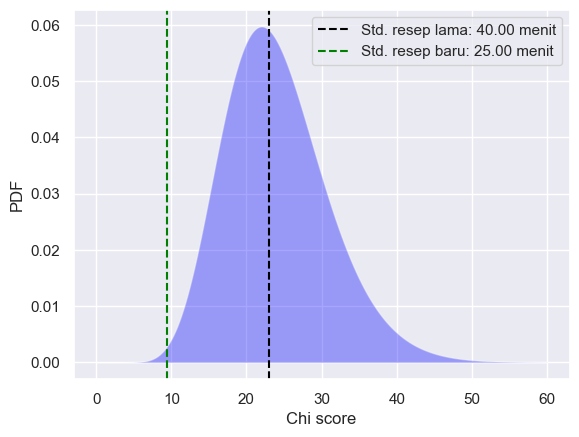

In [34]:
# Visualisasi distribusi t-score
chi_ = np.arange(0, 60, 0.01)
pdf_ = chi2.pdf(chi_, df=n-1)

plt.fill_between(chi_, pdf_, facecolor='blue', alpha=0.35)

plt.axvline(n-2, linestyle='--', color='black', label=f'Std. resep lama: {np.sqrt(sigma_square):.2f} menit')
plt.axvline(chi_score, linestyle='--', color='green', label=f'Std. resep baru: {np.sqrt(s_square):.2f} menit')

plt.xlabel('Chi score')
plt.ylabel('PDF')
plt.legend()
plt.show()

## Membuat keputusan
---

- Definisikan significance level, misal $\alpha = 0.05$ atau confidence level 95%

In [35]:
alpha = 0.05

#### Cara 1: Gunakan `chi_crit`
---

- Informasi $\alpha$ harus dikonversi dalam sudut pandang Chi-score agar bisa menjadi threshold penentu signifikansi uji.
- **Ingat**, $\alpha$ serupa dengan confidence level (CDF) dari distribusi Chi squared.
- Maka, $\alpha = 0.05$ atau confidence level 95% adalah `chi_score` yang menyebabkan CDF = 0.95.

In [36]:
# Hitung ppf
chi_crit = chi2.ppf(alpha, df=n-1)
print(f'Chi_critical = {chi_crit:.4f}')

Chi_critical = 13.8484


- Coba visualkan $\alpha$ atau `t_critical`

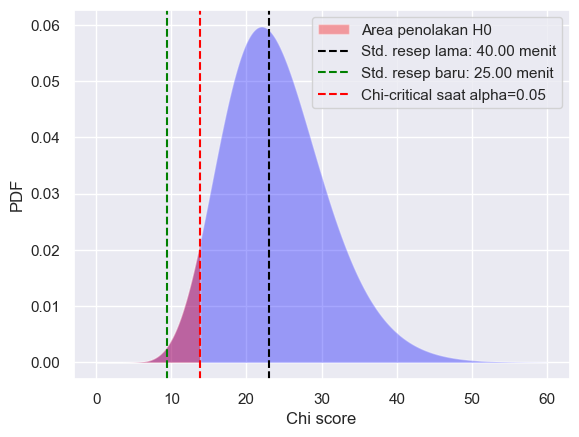

In [37]:
# Visualisasi distribusi t-score
plt.fill_between(chi_, pdf_, facecolor='blue', alpha=0.35)
plt.fill_between(np.arange(0.0, chi_crit, 0.01),
                 chi2.pdf(np.arange(0.0, chi_crit, 0.01), df=n-1),
                 facecolor='red',
                 alpha=0.35,
                 label='Area penolakan H0')

plt.axvline(n-2, linestyle='--', color='black', label=f'Std. resep lama: {np.sqrt(sigma_square):.2f} menit')
plt.axvline(chi_score, linestyle='--', color='green', label=f'Std. resep baru: {np.sqrt(s_square):.2f} menit')
plt.axvline(chi_crit, linestyle='--', color='red', label=f'Chi-critical saat alpha={alpha:.2f}')

plt.xlabel('Chi score')
plt.ylabel('PDF')
plt.legend()
plt.show()

- Sekarang kita bisa buat keputusan.

$$
\text{decision} =
\begin{cases}
 & \text{H0 ditolak,} \text{ jika } \chi^{2}_{\text{test}} < \chi^{2}_{\text{crit}} \\
 & \text{H0 gagal ditolak,} \chi^{2}_{\text{test}} = \chi^{2}_{\text{crit}}
\end{cases}
$$

In [38]:
print('Pengambilan Keputusan:')
if chi_score < chi_crit:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


#### Cara 2: Gunakan $\alpha$
---

- $\alpha$ analog dengan CDF dari distribusi chi.
- Maka kita bisa konversi `chi_score` ke dalam CDF
- Ini bisa didapat menggunakan fungsi `chi2.cdf()`
- Hasil konversi ini disebut dengan **p_value**

In [39]:
# Hitung p_value dari t_score
p_value = chi2.cdf(chi_score, df=n-1)
print(f'p_value : {p_value:.4f}')

p_value : 0.0033


- Sekarang kita bisa buat keputusan.

$$
\text{decision} =
\begin{cases}
 & \text{H0 ditolak,} \text{ jika } \text{p_value} < \alpha \\
 & \text{H0 gagal ditolak,} \text{ jika } \text{p_value} \geq \alpha
\end{cases}
$$

In [40]:
print('Pengambilan Keputusan:')
if p_value < alpha:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Tolak H0


## Kesimpulan
---

- Berdasarkan aturan keputusan, kita tolak null hypothesis
- Maka dapat disimpulkan bahwa varians waktu pembuatan masakan resep baru kurang dari 40 menit.

# Case Study 4 - Perusahaan Tuna
---

- Perusahaan Tuna menggunakan dua mesin untuk mengisi setiap 5 ons tuna.
- Manajer dari perusahaan tersebut ingin membandingkan varians waktu dari dua mesin pengalengan.
- Untuk mengetahui hal tersebut, sebuah sampel dari kaleng-kaleng dipilih dari beberapa mesin untuk dilakukan pengujian.
- Hasilnya diperoleh sebagai berikut :
 $$ n_{1} = 25 \hspace{1 cm} \bar{x}_{1}=5,0592  \hspace{1cm} s^{2}_{1}=0,1130 \hspace{1cm} s_{1}= 0,3361$$
 $$ n_{2} = 21 \hspace{1 cm} \bar{x}_{2}=4,9808  \hspace{1cm} s^{2}_{2}=0,0537 \hspace{1cm} s_{2}= 0,2317$$

- Apakah varians dari mesin satu sama dengan mesin dua? Apakah operasi pada tingkat varians yang sama?

## Hipotesis
---

- Berdasarkan soal, maka didapat
  - $H_{0}$: $s^{2}_{1} = s^{2}_{2}$
  - $H_{1}$: $s^{2}_{1} \neq s^{2}_{2}$

## Uji statistik yang dilakukan
---

- Apa yang kita bandingkan? **Varians**, gunakan Chi-test atau F-test
- Apa yang dibandingkan? Varians antar **2 sample**, gunakan F-test

- Kita dapat menggunakan f distribution untuk menyelesaikan permasalahan tersebut :
$$
F = \frac{s^{2}_{x}}{s^{2}_{y}}
$$

- dengan $s^{2}_{x} > s^{2}_{y}$

- Mari kita hitung

In [41]:
# Masukkan data
nx = 25
ny = 21

In [42]:
# Hitung f_score
s2_x = 0.1130
s2_y = 0.0537

f_score = s2_x/s2_y
print(f'F-score = {f_score:.4f}')

F-score = 2.1043


- Nilai f-score > 1 karena $s^{2}_{x} > s^{2}_{y}$
- Dalam visualisasi

In [43]:
# Import data
from scipy.stats import f

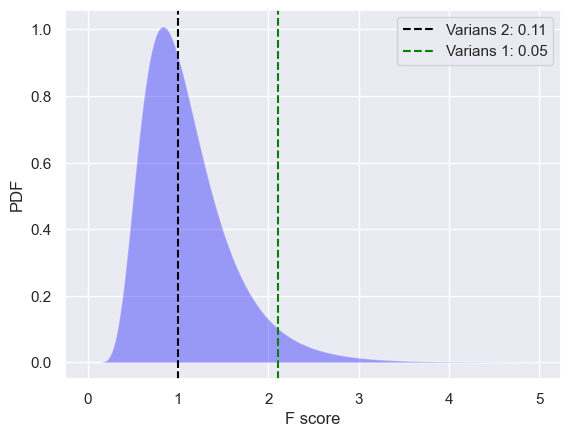

In [44]:
# Visualisasi distribusi t-score
f_ = np.arange(0.0, 5.0, 0.01)
pdf_ = f.pdf(f_, dfn=nx-1, dfd=ny-1)

plt.fill_between(f_, pdf_, facecolor='blue', alpha=0.35)

plt.axvline(1.0, linestyle='--', color='black', label=f'Varians 2: {s2_x:.2f}')
plt.axvline(f_score, linestyle='--', color='green', label=f'Varians 1: {s2_y:.2f}')

plt.xlabel('F score')
plt.ylabel('PDF')
plt.legend()
plt.show()

## Membuat keputusan
---

- Definisikan significance level, misal $\alpha = 0.05$ atau confidence level 95%

In [45]:
alpha = 0.05

#### Cara 1: Gunakan `F_critical`
---

- Informasi $\alpha$ harus dikonversi dalam sudut pandang f-score agar bisa menjadi threshold penentu signifikansi uji.
- **Ingat**, $\alpha$ serupa dengan confidence level (CDF) dari distribusi F-score.
- Maka, $\alpha = 0.05$ atau confidence level 95% adalah `F_score` yang menyebabkan CDF = 0.95.

In [46]:
# Hitung ppf
# Akan ada 2 f_critical karena H1 bernilai !=,
# maka alpha dibagi 2 agar CDF tetap 95%
f_crit_lower = f.ppf(alpha/2., dfn=nx-1, dfd=ny-1)
f_crit_upper = f.ppf(1 - (alpha/2.), dfn=nx-1, dfd=ny-1)

print(f'Saat alpha = {alpha}')
print(f' - f_critical_lower = {f_crit_lower:.4f}')
print(f' - f_critical_upper = {f_crit_upper:.4f}')

Saat alpha = 0.05
 - f_critical_lower = 0.4297
 - f_critical_upper = 2.4076


- Coba visualkan $\alpha$ atau `f_critical`

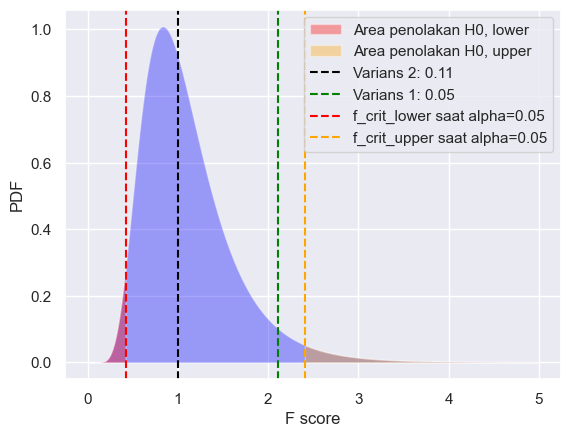

In [47]:
plt.fill_between(f_, pdf_, facecolor='blue', alpha=0.35)

plt.fill_between(np.arange(0.0, f_crit_lower, 0.01),
                 f.pdf(np.arange(0.0, f_crit_lower, 0.01), dfn=nx-1, dfd=ny-1),
                 facecolor='red',
                 alpha=0.35,
                 label='Area penolakan H0, lower')

plt.fill_between(np.arange(f_crit_upper, 5.0, 0.01),
                 f.pdf(np.arange(f_crit_upper, 5.0, 0.01), dfn=nx-1, dfd=ny-1),
                 facecolor='orange',
                 alpha=0.35,
                 label='Area penolakan H0, upper')

plt.axvline(1.0, linestyle='--', color='black', label=f'Varians 2: {s2_x:.2f}')
plt.axvline(f_score, linestyle='--', color='green', label=f'Varians 1: {s2_y:.2f}')
plt.axvline(f_crit_lower, linestyle='--', color='red', label=f'f_crit_lower saat alpha={alpha}')
plt.axvline(f_crit_upper, linestyle='--', color='orange', label=f'f_crit_upper saat alpha={alpha}')

plt.xlabel('F score')
plt.ylabel('PDF')
plt.legend()
plt.show()

- Sekarang kita bisa buat keputusan.

$$
\text{decision} =
\begin{cases}
 & \text{H0 ditolak,} \text{ jika } f_{\text{test}} < f_{\text{crit lower}} \\
  & \text{H0 ditolak,} \text{ jika } f_{\text{test}} > f_{\text{crit upper}} \\
 & \text{H0 gagal ditolak,} \text{ jika } f_{\text{crit lower}} \leq f_{\text{test}} \leq f_{\text{crit upper}}
\end{cases}
$$

In [48]:
print('Pengambilan Keputusan:')
if f_score < f_crit_lower:
    print('Tolak H0')
elif f_score > f_crit_upper:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Gagal tolak H0


#### Cara 2: Gunakan $\alpha$
---

- $\alpha$ analog dengan CDF dari distribusi F.
- Maka kita bisa konversi `f_score` ke dalam CDF
- Ini bisa didapat menggunakan fungsi `f.cdf()`
- Hasil konversi ini disebut dengan **p_value**

In [49]:
# Hitung p_value dari t_score
p_val_lower = f.cdf(f_score, dfn=nx-1, dfd=ny-1)
p_val_upper = 1 - p_val_lower
p_value = 2. * np.min([p_val_lower, p_val_upper])

print(f'p_value : {p_value:.4f}')

p_value : 0.0954


- Sekarang kita bisa buat keputusan.

$$
\text{decision} =
\begin{cases}
 & \text{H0 ditolak,} \text{ jika } \text{p_value} < \alpha \\
 & \text{H0 gagal ditolak,} \text{ jika } \text{p_value} \geq \alpha
\end{cases}
$$

In [50]:
print('Pengambilan Keputusan:')
if p_value < alpha:
    print('Tolak H0')
else:
    print('Gagal tolak H0')

Pengambilan Keputusan:
Gagal tolak H0
